# Imports

In [ ]:
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Import Data

# Analysis Functions

In [ ]:
def confusion_matrix(preds, truths):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for pred, truth in zip(preds, truths):
        if truth == 1:
            if pred == truth:
                tp += 1
            else:
                fn += 1
        else:
            if pred == truth:
                tn += 1
            else:
                fp += 1
    return tp, fp, tn, fn

In [ ]:
def get_precision(tp, fp):
    return tp / (tp + fp)

def get_recall(tp, fn):
    return tp / (tp + fn)

def get_accuracy(tp, fn, fp, tn):
    return (tp + tn) / (tp + fp + fn + tn)

def get_f1(tp, fp, fn):
    prec = get_precision(tp, fp)
    rec = get_recall(tp, fn)
    return 2 * prec * rec / (prec + rec)

In [ ]:
def get_all_metrics(preds, truths):
    tp, fp, tn, fn = confusion_matrix(preds, truths)

    print(tp, fp, fn, tn)
    prec = 0 # get_precision(tp, fp)
    rec = 0 #get_recall(tp, fn)
    acc = get_accuracy(tp, fn, fp, tn)
    f1 = 0 #get_f1(tp, fp, fn)
    return prec, rec, acc, f1

In [ ]:
def prec_recall_score(preds, test_labels, probs):
    prob_thresholds = [i / 100 for i in range(0, 96, 1)]
    prec_list = []
    rec_list = []
    for threshold in prob_thresholds:
        tp = 0
        fp = 0
        fn = 0
        tn = 0
        for pred, truth, prob in zip(preds, test_labels, probs):
            prob = prob[1]

            label = 0 if prob < threshold else 1
            if label == truth:
                if truth == 1:
                    tp += 1
            else:
                if label == 1:
                    fp += 1
                else:
                    fn += 1
        prec = get_precision(tp, fp)
        rec = get_recall(tp, fn)
        prec_list.append(prec)
        rec_list.append(rec)
    return prec_list, rec_list

In [ ]:
prec_list, rec_list = prec_recall_score(rand_forest_preds, test_labels, rand_forest_probs)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

NameError: ignored

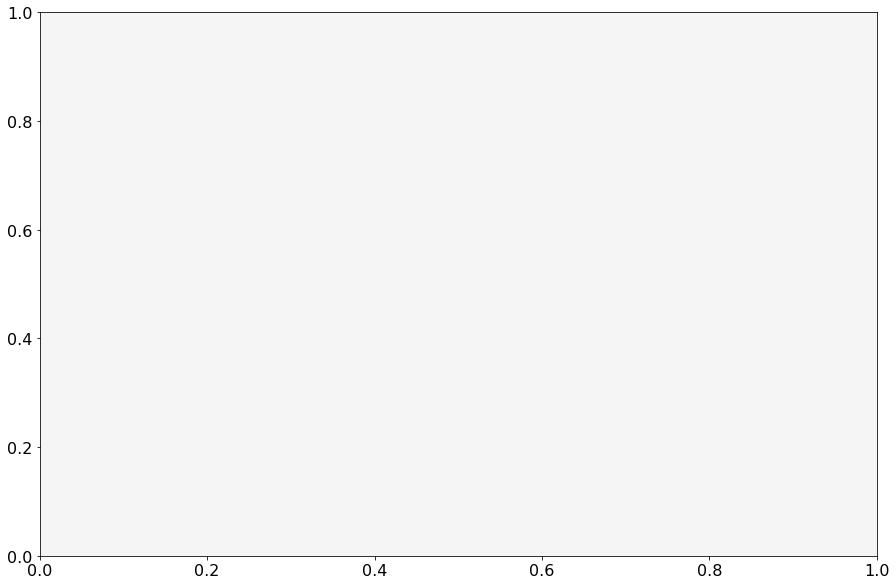

In [ ]:
fig = plt.figure(figsize=(15, 10))

ax = plt.axes()
ax.set_facecolor('whitesmoke')

# Set tick font size
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
	label.set_fontsize(16)

# plt.plot(epochs_cnn, train_loss)
print(rec_list)
plt.plot(rec_list, prec_list)
plt.title('Random Forest Precision vs Recall', fontsize=25)
plt.xlabel('Recall', fontsize=20)
plt.xticks(np.arange(0, 1.01, 0.1))
plt.ylabel('Precision', fontsize=20)
plt.legend()
plt.show()

## Prepare Training Data

In [ ]:
train_df = pd.read_csv('b_train.csv')

# Get Labels
train_labels = train_df['Survived']

# Drop survived and passenger ID
train_df = train_df.drop(columns=['Survived', 'PassengerID'])

FileNotFoundError: ignored

In [ ]:
print(train_df)

     Pclass  Sex   Age  SibSp  Parch      Fare
0         1    0   4.0      0      2   81.8583
1         1    1  36.0      1      2  120.0000
2         3    1  15.0      0      0    8.0292
3         1    1  30.0      0      0   86.5000
4         2    0  51.0      0      0   12.5250
..      ...  ...   ...    ...    ...       ...
566       3    0  34.0      0      0    6.4958
567       3    0  18.0      1      0    6.4958
568       2    0   2.0      1      1   26.0000
569       3    0  20.0      0      0    9.2250
570       2    1  24.0      0      2   14.5000

[571 rows x 6 columns]


## Prepare Testing Data

In [ ]:
test_df = pd.read_csv('b_test.csv')

# Get Labels
test_labels = test_df['Survived']

# Drop survived and passenger ID
test_df = test_df.drop(columns=['Survived', 'PassengerID'])

# Decision Tree

## Train

In [ ]:
# Create and train decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=5)
decision_tree = decision_tree.fit(train_df, train_labels)

## Test

In [ ]:
decision_tree_preds = decision_tree.predict(test_df)

In [ ]:
dec_prec, dec_rec, dec_acc, dec_f1 = get_all_metrics(decision_tree_preds, test_labels)
print(dec_prec, dec_rec, dec_acc, dec_f1)

0.78 0.7358490566037735 0.8251748251748252 0.7572815533980584


'iris.pdf'

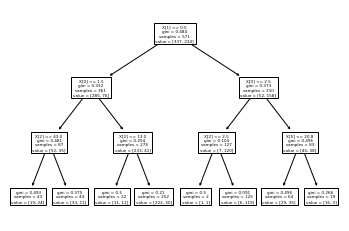

In [ ]:
tree.plot_tree(decision_tree)
import graphviz 
dot_data = tree.export_graphviz(decision_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

# Random Forest

## Train

In [ ]:
rand_forest = RandomForestClassifier(max_depth=5, random_state=0)
rand_forest.fit(train_df, train_labels)

RandomForestClassifier(max_depth=5, random_state=0)

## Test

In [ ]:
rand_forest_preds = rand_forest.predict(test_df)
rand_forest_probs = rand_forest.predict_proba(test_df)
print(rand_forest_probs)

In [ ]:
rf_prec, rf_rec, rf_acc, rf_f1 = get_all_metrics(rand_forest_preds, test_labels)
print(rf_prec, rf_rec, rf_acc, rf_f1)

0.8888888888888888 0.7692307692307693 0.8811188811188811 0.8247422680412372


# Neural Network

## Train

In [ ]:
neural_net = MLPClassifier(random_state=1, max_iter=500)
neural_net.fit(train_df, train_labels)

MLPClassifier(max_iter=500, random_state=1)

## Test

In [ ]:
neural_net_preds = neural_net.predict(test_df)
neural_net_probs = neural_net.predict_proba(test_df)
print(neural_net_probs)

In [ ]:
nn_prec, nn_rec, nn_acc, nn_f1 = get_all_metrics(neural_net_preds, test_labels)
print(nn_prec, nn_rec, nn_acc, nn_f1)

0.7704918032786885 0.8392857142857143 0.8391608391608392 0.8034188034188035


# Loop

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
holdouts = [['a_train.csv', 'a_test.csv'], ['b_train.csv', 'b_test.csv'], ['c_train.csv', 'c_test.csv'], ['d_train.csv', 'd_test.csv'], ['e_train.csv', 'e_test.csv']]
# holdouts = [['a_train.csv', 'a_test.csv'], ['b_train.csv', 'b_test.csv'], ['d_train.csv', 'd_test.csv']]

In [ ]:
import statistics
import random

In [ ]:

def randPreds(test_df):
    return_list = []
    print('test: ', len(test_df))
    for line in range(0, len(test_df)):
        k = randint(0, 1)
        return_list.append(0)
    print('return: ', len(return_list))
    return return_list

In [ ]:
prec_list, rec_list, acc_list, f1_list = [], [], [], []
for holdout in holdouts:
    train_curr, test_curr = holdout
    train_df, test_df, train_labels, test_labels = formatTrainTest(train_curr, test_curr)
    # print(train_df.values)

    # neural_net = MLPClassifier(random_state=1, hidden_layer_sizes=(100, 100), max_iter=500, solver='adam', early_stopping=True, n_iter_no_change=1000).fit(train_df.values, train_labels.values)
    # neural_net = MLPClassifier(random_state=1, hidden_layer_sizes=(100, 100), max_iter=300, solver='adam').fit(train_df, train_labels)
    # neural_net.fit(train_df, train_labels)

    # decision_tree = tree.DecisionTreeClassifier(max_depth=5)
    # decision_tree = decision_tree.fit(train_df, train_labels)
    # clf = GaussianNB().fit(train_df, train_labels)
    clf_preds = randPreds(test_df)
    # rand_forest = RandomForestClassifier(max_depth=5, random_state=0)
    # rand_forest.fit(train_df, train_labels)

    # rand_forest_preds = rand_forest.predict(test_df)
    # rand_forest_probs = rand_forest.predict_proba(test_df)

    # neural_net_preds = neural_net.predict(test_df)
    # dec_preds = decision_tree.predict(test_df)
    nn_prec, nn_rec, nn_acc, nn_f1 = get_all_metrics(clf_preds, test_labels)
    prec_list.append(nn_prec)
    rec_list.append(nn_rec)
    acc_list.append(nn_acc)
    f1_list.append(nn_f1)
    # # avg_acc += nn_acc
    # print(nn_prec, nn_rec, nn_acc, nn_f1)

prec_mean = statistics.mean(prec_list)
rec_mean = statistics.mean(rec_list)
acc_mean = statistics.mean(acc_list)
f1_mean = statistics.mean(f1_list)

prec_stdev = statistics.pstdev(prec_list)
rec_stdev = statistics.pstdev(rec_list)
acc_stdev = statistics.pstdev(acc_list)
f1_stdev = statistics.pstdev(f1_list)

print(prec_mean, prec_stdev)
print(rec_mean, rec_stdev)
print(acc_mean, acc_stdev)
print(f1_mean, f1_stdev)

test:  143
return:  143
0 0 53 90
test:  143
return:  143
0 0 52 91
test:  143
return:  143
0 0 58 85
test:  143
return:  143
0 0 64 79
test:  142
return:  142
0 0 63 79
0 0.0
0 0.0
0.5937850881512853 0.035187278096294926
0 0.0


In [ ]:
def formatTrainTest(train_curr, test_curr):
    train_df = pd.read_csv(train_curr)
    test_df = pd.read_csv(test_curr)

    # Get Labels
    train_labels = train_df['Survived']

    # Drop survived and passenger ID
    train_df = train_df.drop(columns=['Survived', 'PassengerID'])

    # Get Labels
    test_labels = test_df['Survived']

    # Drop survived and passenger ID
    test_df = test_df.drop(columns=['Survived', 'PassengerID'])

    return train_df, test_df, train_labels, test_labels